# Data Wrangling Project - WeRateDogs Twitter Data

## Introduction
This project gather data from variety of sources in different formats to assess its quality and tidiness, then will be cleaned to find insights of twitter data.

## Data Gathering

In [336]:
#import necessary libraries
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
import re
import matplotlib.pyplot as plt


### Downloading Twitter archive enhased

In [337]:
#Download twitter-archive-enhanced csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced_new.csv')

### Downloading Image prediction data

In [338]:
#Programatically download Udacity image prediction file
response = requests.get( 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode='wb')as file:
    file.write(response.content)
    

In [339]:
#Read image predition into a dataframe
image_predictions = pd.read_csv('image_predictions.tsv', delimiter = '\t')

### Downloading data via Twitter API

In [340]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [341]:
#Download tweeter data

In [342]:
#Creating an twitter api object usign tweepy library

#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_secret = ''

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)



In [343]:
#tweet_ids = twitter_archive.tweet_id.values

#with open('tweet_json.txt', 'w') as output:
    #for tweet_id in tweet_ids:
       # try:
          #  tweet = api.get_status(tweet_id, tweet_mode='extended')
           # json.dump(tweet._json, output)
            #output.write('\n')
       # except tweepy.TweepError:
           # print('Error: tweet missing')



Though I was able to create a API object, but couldn't extract the tweets as I got every tweets as missing

In [344]:
#Since the above codes for downloading twitter data using twitter api wasn't succesful, had to use the Udacity provided JSON.txt file
tweets_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        try:
            tweets_dict['tweet_id'] = tweets_json['extended_entities']['media'][0]['id']
        except:
            tweets_dict['tweet_id'] = 'na'
      
        tweets_dict['tweet_id'] = tweets_json['id']
        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)



In [345]:
#Creating a tweets dataframe from the tweets_list
tweets_api = pd.DataFrame(tweets_list)
tweets_api.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


## Data Assessing

### Twitter_archieve data

In [346]:
#Read first 5 rows of twitter_archive dataframe
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [347]:
twitter_archive.shape

(2356, 17)

In [348]:
twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [349]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

in_reply_to_status_id ,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp columns have significant amount of missing values. Also expanding_url has nearly 350 missing values.  
tweet_id, timestamp, source, dogs' stages columns data type should be changed

In [350]:
twitter_archive.tweet_id.duplicated().sum()

0

In [351]:
dup = twitter_archive[twitter_archive.tweet_id.duplicated(keep = False)]
dup

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Though these tweet_ids are duplicated they are either retweet or reply. Since only the original tweets are intrested here these will be removed for the analysis purpose. Index 1872 and 1894 are duplicated but with different tweet_text, so will not be removed from the datasets.

In [352]:
#Finding available denominator values in the coloumns
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

There are 23 denominator values which are !=10

In [353]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Though numerator can be above 10, some entries are extremely higher than 10.

In [354]:
#Displaying random 15 sample from the data
twitter_archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1089,737800304142471168,NaN,NaN,2016-06-01 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's ubering home after a few ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737800304...,10,10,Bella,None,None,None,None
1586,686760001961103360,NaN,NaN,2016-01-12 04:01:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper forgot how to walk. 12/10 happens ...,NaN,NaN,NaN,https://vine.co/v/iMvubwT260D,12,10,None,None,None,pupper,None
1941,673715861853720576,NaN,NaN,2015-12-07 04:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a heavily opinionated dog. Loves walls...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673715861...,4,10,a,None,None,None,None
495,813172488309972993,NaN,NaN,2016-12-26 00:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eleanor. She winks like she knows many...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813172488...,12,10,Eleanor,None,None,None,None
1816,676606785097199616,NaN,NaN,2015-12-15 03:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*screeches for a sec and then faints* 12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676606785...,12,10,None,None,None,None,None
238,847116187444137987,NaN,NaN,2017-03-29 16:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable... We. Only. Rate. Dogs. Please s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847116187...,11,10,None,None,None,None,None
2253,667793409583771648,NaN,NaN,2015-11-20 19:55:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Dogs only please. Small cows and other non can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667793409...,8,10,None,None,None,None,None
1985,672898206762672129,NaN,NaN,2015-12-04 22:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheryl AKA Queen Pupper of the Skies. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672898206...,11,10,Cheryl,None,None,pupper,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
1097,736225175608430592,NaN,NaN,2016-05-27 15:58:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736225175...,10,10,very,None,None,None,None


There are missing dog's or unknown dog's names entered as None.

In [355]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Toby          7
Daisy         7
Buddy         7
Bailey        7
an            7
Jax           6
Koda          6
Bella         6
Dave          6
Leo           6
Milo          6
Rusty         6
Jack          6
Stanley       6
Scout         6
Oscar         6
Bentley       5
           ... 
Pherb         1
Amber         1
Emma          1
Wesley        1
Bodie         1
Mary          1
Ben           1
Aja           1
Dobby         1
Cal           1
Leonidas      1
Millie        1
Rontu         1
Arnold        1
Pluto         1
Clarkus       1
Jomathan      1
Tove          1
Chesney       1
Pepper        1
Lucia         1
Hazel         1
Filup         1
Blipson       1
Craig         1
Evy           1
Zara          1
Jaspers       1
Brockly       1
Mabel         1
Name: name, Length: 957,

There are 745 None entries, invalid dogs names in lowercase such as 'a', 'an', 'the'

In [356]:
#Finding value counts for dog life stage values
print(twitter_archive.pupper.value_counts())
print(twitter_archive.doggo.value_counts())
print(twitter_archive.floofer.value_counts())
print(twitter_archive.puppo.value_counts())


None      2099
pupper     257
Name: pupper, dtype: int64
None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


Missing information entered as 'none' in doggo, pupper, floofer and puppo columns. Since there are significant numbers of none entries these rows can't be eliminated.

In [357]:
#Finding number of different twitter platform used by users
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Source column is not readable.

### Quality Issues
1. There are 23 occurances of denominator entries which are !10. Replace them with 10.
2. Decimal values for numerator in text should be included in rating_numerator
3. Rename columns: time_stamp to tweet_time, text to tweets, names to dog's name
4. Make 'source' column readable.
5. Erroneous data types, tweet_id - string, times stamp - date and time, life_stage - category.
6. Remove rows with no images - expanded_url.
7. Dogs name entered as None and lowercase should be removed
8. Drop columns that are not necessary for the analysis; in_reply_to_status_id, in_reply_to_user_id,retweeted_status_user_id
   retweeted_status_timestamp
9. There are 181 retweets which need to be removed.
10. There are 78 tweet replies which need to be removed


### Tidiness Issues

1. Combine columns "doggo", "floofer", "pupper", and "puppo" to one life_stage column.
2. Three datasets should be merged as they are part of the same observational unit.




### Image_predictions data

In [358]:
#Displaying first 5 rows of image_predictions data
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [359]:
#Displaying last 5 rows of image_predictions data
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [360]:
#Displaying random 5 sample from the data
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
59,667119796878725120,https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg,1,Pembroke,0.741563,True,Chihuahua,0.057866,True,toy_poodle,0.039125,True
495,675740360753160193,https://pbs.twimg.com/ext_tw_video_thumb/67574...,1,golden_retriever,0.800495,True,kuvasz,0.097756,True,Saluki,0.068415,True
747,687704180304273409,https://pbs.twimg.com/media/CYs3TKzUAAAF9A2.jpg,1,miniature_pinscher,0.956063,True,toy_terrier,0.012231,True,Chihuahua,0.005397,True
1845,838921590096166913,https://pbs.twimg.com/media/C6Ryuf7UoAAFX4a.jpg,1,Border_terrier,0.664538,True,Brabancon_griffon,0.170451,True,Yorkshire_terrier,0.087824,True
1678,813202720496779264,https://pbs.twimg.com/media/C0kTjqIXgAAqpRi.jpg,1,cocker_spaniel,0.701852,True,golden_retriever,0.120345,True,Labrador_retriever,0.036320,True


In [361]:
image_predictions.shape

(2075, 12)

In [362]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


image_predictions dataset has no missing entries.
tweet_id, img_num datatypes should be changed

In [363]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


85% dogs breed prediction have been above the 75th centile. Image number has 4 img_num levels

In [364]:
#Checking for duplicates
dup = image_predictions[image_predictions.tweet_id.duplicated(keep = False)]
dup

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [365]:
#Finding value_counts for predicted 1 dog column
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
beagle                        18
Eskimo_dog                    18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [366]:
#Finding value_counts for predicted 2 dog column
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
Samoyed                            20
chow                               20
miniature_pinscher                 20
malinois                           20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [367]:
#Finding value_counts for predicted 3 dog column
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

## Quality Issues
1. Predictions dogs columns p1, p2, p3 are inconsistent with the starting letter case -Capitalise all.
2. Rename columns p1, p2, p3 to an understandable name.
3. jpg_url column is redundant: A single observational unit is stored in multiple tables


## Tweets_api data

In [368]:
#Displaying the first 5 rows
tweets_api.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [369]:
#Displaying last 5 rows
tweets_api.tail()

,favorite_count,retweet_count,tweet_id
2349,111,41,666049248165822465
2350,311,147,666044226329800704
2351,128,47,666033412701032449
2352,132,48,666029285002620928
2353,2535,532,666020888022790149


In [370]:
tweets_api.shape

(2354, 3)

In [371]:
tweets_api.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [372]:
#Sum of favorite counts entered as 0.
(tweets_api.favorite_count==0).sum()

179

In [373]:
#Sum of retweet entered as 0
(tweets_api.retweet_count==0).sum()

1

In [374]:
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


There are no missing entries. tweet_id data type should be changed

In [375]:
#Finding duplicates 
dup = tweets_api[tweets_api.tweet_id.duplicated(keep = False)]
dup

,favorite_count,retweet_count,tweet_id


## Data Cleaning

In [376]:
#Copy all three dataframe to new sets
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_api_clean = tweets_api.copy()

**01. Replacing denominators which are !10 with 10.**
>**code**

In [377]:
#Make all denominator values to 10
twitter_archive_clean.rating_denominator = 10

>**Test**

In [378]:
twitter_archive_clean.rating_denominator.describe()

count    2356.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [379]:
twitter_archive_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

**02. Examining the rating numerator with decimals values.**
>**Code**

In [380]:
#incorrect values with rating numerators contain decimals
ratings = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [381]:
#Change the rating_numerator type to float
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

In [382]:
ratings[1].value_counts()

10     2333
11        3
50        3
20        2
80        2
2         1
90        1
70        1
170       1
110       1
120       1
15        1
130       1
16        1
00        1
150       1
40        1
7         1
Name: 1, dtype: int64

In [383]:
ratings[0].value_counts()

12       558
11       464
10       461
13       351
9        158
8        102
7         54
14        54
5         35
6         32
3         19
4         17
1          9
2          9
9.75       2
0          2
15         2
420        2
9.5        1
143        1
24         1
84         1
17         1
50         1
007        1
144        1
165        1
11.27      1
44         1
1776       1
666        1
121        1
960        1
20         1
204        1
45         1
80         1
88         1
99         1
182        1
13.5       1
60         1
11.26      1
Name: 0, dtype: int64

In [384]:
#assigning rating_numerator with the ratings series
ratings[0] = twitter_archive_clean.rating_numerator

>**Test**

In [385]:
twitter_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1194,717428917016076293,NaN,NaN,2016-04-05 19:09:17 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Skittle. He's trying to communicate. 1...,NaN,NaN,NaN,https://vine.co/v/iIhEU2lVqxz,11.0,10,Skittle,None,None,None,None
202,853639147608842240,NaN,NaN,2017-04-16 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",A photographer took pictures before and after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853639147...,13.0,10,None,None,None,None,None
1794,677328882937298944,NaN,NaN,2015-12-17 03:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. All the dogs adore Derek. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677328882...,10.0,10,Derek,None,None,None,None
100,872820683541237760,NaN,NaN,2017-06-08 14:20:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here are my favorite #dogsatpollingstations \n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872820683...,13.0,10,None,None,None,None,None
1479,693582294167244802,6.935722e+17,1.198989e+09,2016-01-30 23:51:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Personally I'd give him an 11/10. Not sure why...,NaN,NaN,NaN,NaN,11.0,10,None,None,None,None,None
1270,709449600415961088,NaN,NaN,2016-03-14 18:42:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Karma. She's just a head. Lost body durin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709449600...,10.0,10,Karma,None,None,None,None
1507,691675652215414786,NaN,NaN,2016-01-25 17:35:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Richie and Plip. They are the best of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691675652...,10.0,10,Richie,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9.0,10,None,None,None,None,None
1024,746507379341139972,NaN,NaN,2016-06-25 00:56:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shiloh. She did not pass the soft mout...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746507379...,10.0,10,Shiloh,None,None,None,None
1859,675497103322386432,NaN,NaN,2015-12-12 02:07:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reggie. He's going for the world record. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675497103...,11.0,10,Reggie,None,None,None,None


In [386]:
twitter_archive_clean.rating_numerator.value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0        55
14.0       54
5.0        37
6.0        32
3.0        19
4.0        17
1.0         9
2.0         9
75.0        2
15.0        2
420.0       2
0.0         2
144.0       1
666.0       1
121.0       1
182.0       1
165.0       1
17.0        1
45.0        1
204.0       1
960.0       1
1776.0      1
84.0        1
24.0        1
27.0        1
88.0        1
99.0        1
50.0        1
80.0        1
60.0        1
44.0        1
20.0        1
26.0        1
143.0       1
Name: rating_numerator, dtype: int64

**03.Dogs name entered as None and names in lowercase are invalid such as 'a', 'an'** 
>**Code**

In [387]:
#Checking for lower case dogs name
twitter_archive_clean[twitter_archive_clean.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
actually         2
not              2
mad              2
getting          2
his              1
my               1
by               1
this             1
unacceptable     1
old              1
infuriating      1
all              1
such             1
life             1
incredibly       1
officially       1
light            1
space            1
Name: name, dtype: int64

In [388]:
#Subset data with names starting with uppercase
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['name'].str[0].str.isupper()]


In [389]:
#Subset data without None entries
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['name']!='None']


**Test**

In [390]:
#Check for names in lower case
twitter_archive_clean[twitter_archive_clean.name.str.islower()].name.value_counts()

Series([], Name: name, dtype: int64)

In [391]:
#Check for None entries
(twitter_archive_clean.name=='None').value_counts()

False    1502
Name: name, dtype: int64

**04. Omit the retweet and reply rows.**
>**Code**

In [392]:
#Deleting the retweeted rows and reply rows
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isna()]


>**Test**

In [393]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1390 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1390 non-null object
source                        1390 non-null object
text                          1390 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1390 non-null object
rating_numerator              1390 non-null float64
rating_denominator            1390 non-null int64
name                          1390 non-null object
doggo                         1390 non-null object
floofer                       1390 non-null object
pupper                        1390 non-null object
puppo                         1390 non-null object
dtypes: float64(5), int64(2), object(1

**05. Remove irrelevant columns**
>**Code**

In [394]:
#Deleting the column names
twitter_acrchive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace=True)
image_predictions_clean = image_predictions.drop(['jpg_url'], axis = 1)

>**Test**

In [395]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 12 columns):
tweet_id              1390 non-null int64
timestamp             1390 non-null object
source                1390 non-null object
text                  1390 non-null object
expanded_urls         1390 non-null object
rating_numerator      1390 non-null float64
rating_denominator    1390 non-null int64
name                  1390 non-null object
doggo                 1390 non-null object
floofer               1390 non-null object
pupper                1390 non-null object
puppo                 1390 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 141.2+ KB


In [396]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 135.8+ KB


**06. Rename column names**
>**Code**

In [397]:
#Renaming column names
twitter_archive_clean.rename(columns={'timestamp': 'tweet_time','text':'tweets','expanded_urls':'jpg_url','names':'dog_name'}, inplace=True)
image_predictions_clean.rename(columns={'p1': 'pred1_dog_breed','p2':'pred2_dog_breed','p3':'pred3_dog_breed'}, inplace=True)

>**Test**

In [398]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 12 columns):
tweet_id              1390 non-null int64
tweet_time            1390 non-null object
source                1390 non-null object
tweets                1390 non-null object
jpg_url               1390 non-null object
rating_numerator      1390 non-null float64
rating_denominator    1390 non-null int64
name                  1390 non-null object
doggo                 1390 non-null object
floofer               1390 non-null object
pupper                1390 non-null object
puppo                 1390 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 141.2+ KB


In [399]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id           2075 non-null int64
img_num            2075 non-null int64
pred1_dog_breed    2075 non-null object
p1_conf            2075 non-null float64
p1_dog             2075 non-null bool
pred2_dog_breed    2075 non-null object
p2_conf            2075 non-null float64
p2_dog             2075 non-null bool
pred3_dog_breed    2075 non-null object
p3_conf            2075 non-null float64
p3_dog             2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 135.8+ KB


**07. Combine columns "doggo", "floofer", "pupper", and "puppo" to one life_stage column**
>**Code**

In [400]:
#Checking for multiple dog stages in a row.
twitter_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1206
1,None,None,None,puppo,16
2,None,None,pupper,None,121
3,None,floofer,None,None,5
4,doggo,None,None,None,38
5,doggo,None,pupper,None,4


In [401]:
#Replace None or Nan with ' '
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.doggo.replace(np.NaN, '', inplace=True)

In [402]:
#Replace None or Nan with ' '
twitter_archive_clean.puppo.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace(np.NaN, '', inplace=True)

In [403]:
#Replace None or Nan with ' '
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace(np.NaN, '', inplace=True)

In [404]:
#Replace None or Nan with ' '
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace(np.NaN, '', inplace=True)

In [405]:
#Concatinate the dog stages to 'stage'
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo


In [406]:
##Combining multiple entries
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [407]:
twitter_archive_clean.stage.value_counts()

                 1206
pupper            121
doggo              38
puppo              16
floofer             5
doggo, pupper       4
Name: stage, dtype: int64

In [408]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo'], axis = 1)
twitter_archive_clean = twitter_archive_clean.drop(['puppo'], axis = 1)
twitter_archive_clean = twitter_archive_clean.drop(['floofer'], axis = 1)
twitter_archive_clean = twitter_archive_clean.drop(['pupper'], axis = 1)

**Test**

In [409]:
twitter_archive_clean.head()

,tweet_id,tweet_time,source,tweets,jpg_url,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,


**08. Make 'source' column readable**
>**Code**

In [410]:
#Extracting text between '<','>' to make source column readable
import re
twitter_archive_clean.source = twitter_archive_clean.source .apply(lambda x: re.findall(r'>(.*)<', x)[0])

>**Test**

In [411]:
#Value counts for source of twitter account use

twitter_archive_clean.source.value_counts()

Twitter for iPhone     1324
Vine - Make a Scene      41
Twitter Web Client       16
TweetDeck                 9
Name: source, dtype: int64

1964 twitters using iphone twitter platform

**09. Change data type for columns where necessary**
>**Code**

In [441]:
#Changing the data type of columns
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions.tweet_id.astype(str)
tweets_api_clean.tweet_id = tweets_api_clean.tweet_id.astype(str)
twitter_archive_clean.tweet_time = pd.to_datetime(twitter_archive_clean.tweet_time)
twitter_archive_clean.source = twitter_archive_clean.source.astype('category')
twitter_archive_clean.stage = twitter_archive_clean.stage.astype('category')
image_predictions_clean.img_num = image_predictions.img_num.astype('category')

>**Test**

In [442]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 9 columns):
tweet_id              1390 non-null object
tweet_time            1390 non-null datetime64[ns]
source                1390 non-null category
tweets                1390 non-null object
jpg_url               1390 non-null object
rating_numerator      1390 non-null float64
rating_denominator    1390 non-null int64
name                  1390 non-null object
stage                 1390 non-null category
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 90.0+ KB


In [443]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id           2075 non-null object
img_num            2075 non-null category
pred1_dog_breed    2075 non-null object
p1_conf            2075 non-null float64
p1_dog             2075 non-null bool
pred2_dog_breed    2075 non-null object
p2_conf            2075 non-null float64
p2_dog             2075 non-null bool
pred3_dog_breed    2075 non-null object
p3_conf            2075 non-null float64
p3_dog             2075 non-null bool
dtypes: bool(3), category(1), float64(3), object(4)
memory usage: 121.8+ KB


In [444]:
tweets_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


**10. Remove rows with no image url**
>**Code**

In [445]:
#Removing the empty rows for jpg_url column
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['jpg_url'].notna()]

>**Test**

In [446]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 9 columns):
tweet_id              1390 non-null object
tweet_time            1390 non-null datetime64[ns]
source                1390 non-null category
tweets                1390 non-null object
jpg_url               1390 non-null object
rating_numerator      1390 non-null float64
rating_denominator    1390 non-null int64
name                  1390 non-null object
stage                 1390 non-null category
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 90.0+ KB


**11. Capitalise the predicted dog's breed name**
>**Code**

In [447]:
#Capitalise the Prediction dogs name
image_predictions_clean.pred1_dog_breed = image_predictions_clean.pred1_dog_breed.str.capitalize()
image_predictions_clean.pred2_dog_breed = image_predictions_clean.pred2_dog_breed.str.capitalize()
image_predictions_clean.pred3_dog_breed = image_predictions_clean.pred3_dog_breed.str.capitalize()

>**Test**

In [448]:
image_predictions_clean.sample(5)

,tweet_id,img_num,pred1_dog_breed,p1_conf,p1_dog,pred2_dog_breed,p2_conf,p2_dog,pred3_dog_breed,p3_conf,p3_dog
2025,881906580714921986,1,Weimaraner,0.291539,True,Chesapeake_bay_retriever,0.278966,True,Koala,0.127017,False
978,707059547140169728,1,Samoyed,0.897312,True,Great_pyrenees,0.039180,True,Kuvasz,0.019516,True
1353,760190180481531904,1,Balloon,0.917525,False,Confectionery,0.049329,False,Maraca,0.017648,False
774,689623661272240129,1,Toy_poodle,0.279604,True,Mashed_potato,0.208564,False,Labrador_retriever,0.077481,True
1629,805207613751304193,1,Pembroke,0.244705,True,Rhodesian_ridgeback,0.180461,True,Cardigan,0.094664,True


**12. Merge all three dataset to one, twitter_final**
>**Code**

In [449]:
#Merge all three dataset to one
twitter_archive_master= pd.merge(twitter_archive_clean, tweets_api_clean, on='tweet_id', how='inner')

In [450]:
twitter_archive_master= twitter_archive_master.merge(image_predictions_clean, on='tweet_id', how='inner')

>**Test**

In [451]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1348
Data columns (total 21 columns):
tweet_id              1349 non-null object
tweet_time            1349 non-null datetime64[ns]
source                1349 non-null category
tweets                1349 non-null object
jpg_url               1349 non-null object
rating_numerator      1349 non-null float64
rating_denominator    1349 non-null int64
name                  1349 non-null object
stage                 1349 non-null category
favorite_count        1349 non-null int64
retweet_count         1349 non-null int64
img_num               1349 non-null category
pred1_dog_breed       1349 non-null object
p1_conf               1349 non-null float64
p1_dog                1349 non-null bool
pred2_dog_breed       1349 non-null object
p2_conf               1349 non-null float64
p2_dog                1349 non-null bool
pred3_dog_breed       1349 non-null object
p3_conf               1349 non-null float64
p3_dog                

## Data Storing

In [452]:
#Store merged dataset to csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

In [453]:
#Store all three cleaned dataset to csv files
twitter_archive_clean.to_csv('twitter_archive_clean.csv',index = False)
image_predictions_clean.to_csv('image_predictions_clean.csv',index = False)
tweets_api_clean.to_csv('tweets_api_clean.csv',index = False)

## Visualisation 

**1. What stage of dog's life has a highest favorite count?**

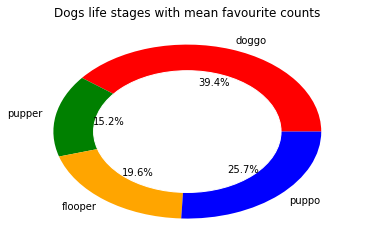

In [454]:
# create deffernt data for dog's life stage
d1 = twitter_archive_master[twitter_archive_master.stage=='doggo']
d2 = twitter_archive_master[twitter_archive_master.stage=='pupper']
d3 = twitter_archive_master[twitter_archive_master.stage=='floofer']
d4 = twitter_archive_master[twitter_archive_master.stage=='puppo']


#Find the mean favorite for above data
d = d1.favorite_count.mean()
pup = d2.favorite_count.mean()
f = d3.favorite_count.mean()
p = d4.favorite_count.mean()


size_of_groups=[d,pup,f,p]
names = 'doggo','pupper','flooper','puppo'

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
 
plt.pie(size_of_groups, labels=names,autopct='%1.1f%%', colors=['red','green','orange','blue'])
plt.title('Dogs life stages with mean favourite counts')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
 

 


It is apparent from the chart that doggo stage has the mean highest favorite_count of 39.4%, whereas pupper has 15.2%

**2. Relationship between Favorites, rating and Retweets**

Text(0.5,1,'Retweets and favorites Scatter plot')

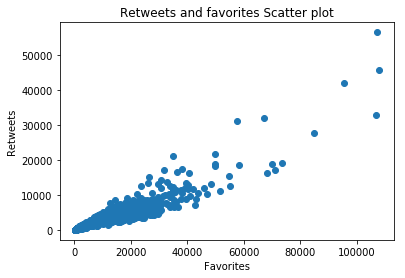

In [455]:
#Plot Scatterplot to find relationship between favorites and tweets
plt.scatter(twitter_archive_master.favorite_count, twitter_archive_master.retweet_count)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

In [456]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.92166979420903705

Retweet and favorites has a strong positive correlation of 92%

In [457]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['rating_numerator'])

0.0096183752190123397

Favorites and rating has a very poor positive correletion of 0.9%

In [458]:
twitter_archive_master['retweet_count'].corr(twitter_archive_master['rating_numerator'])

0.014557301848946385

Retweets and ratings have a very poor positive correlation of 1%

**3. Most succesfully predicted dogs breeds**

In [459]:
#Create a dataset p1 holds the most predicted dogs breed data
dog_name = ["Labrador_retriever","Pembroke","Chihuahua","Pug"]
p1 = twitter_archive_master.query('pred1_dog_breed =="Golden_retriever"')

for name in dog_name:
    
    p1 = p1.append(twitter_archive_master[twitter_archive_master['pred1_dog_breed'] == name])


In [460]:
#Finding the mean value for budjet for each subset
dog_sum =[]
for name in dog_name:
    i = (p1['pred1_dog_breed']==name).sum()
    dog_sum.append(i)


dog_name.append("Golden_retriever")
dog_sum.append(137)

In [461]:
import numpy as np
y_pos = np.arange(len(dog_name))

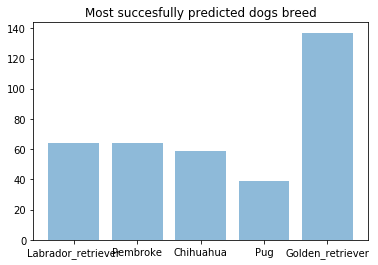

In [462]:
#Plot a bar chart
plt.bar(y_pos, dog_sum, align='center', alpha=0.5)
plt.xticks(y_pos, dog_name)

plt.title('Most succesfully predicted dogs breed')

plt.show()

Golden retriever is the most successfully predicted dogs breed with a confidence interval of 95%

In [463]:
p1.groupby(['pred1_dog_breed'])['p1_conf'].mean()

pred1_dog_breed
Chihuahua             0.586391
Golden_retriever      0.730430
Labrador_retriever    0.655129
Pembroke              0.720005
Pug                   0.762539
Name: p1_conf, dtype: float64

**4. What is the most used twitter platform?** 

In [464]:
twitter_archive_master.source.value_counts()

Twitter for iPhone     1324
Twitter Web Client       16
TweetDeck                 9
Vine - Make a Scene       0
Name: source, dtype: int64

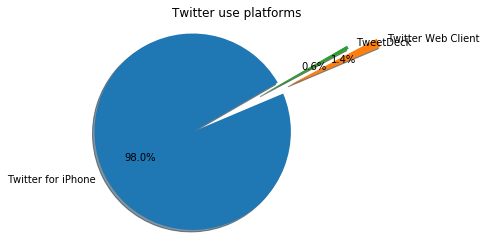

In [465]:
#Plot  pie chart 
labels = 'Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'
sizes = [1932, 28, 11]
explode = (0.3, 0.8, 0.5)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Twitter use platforms")
plt.show()

98% of tweets are from iphone twitter platform

## Insights
**1 What type of dog recieved highest number of favorites count?**

In [466]:
#Finding maximum favorite counts and its corresponding values
max_fav = twitter_archive_master.favorite_count.max()
d = twitter_archive_master.loc[twitter_archive_master.favorite_count==max_fav]
d

,tweet_id,tweet_time,source,tweets,jpg_url,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,pred1_dog_breed,p1_conf,p1_dog,pred2_dog_breed,p2_conf,p2_dog,pred3_dog_breed,p3_conf,p3_dog
46,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10,Duddles,,107956,...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True


It is called Duddles with 107956 favorite count and 13 rating numerator. It is predicted as Englisn_Springer breed with 95% confidence level

**2. What type of dogs stage in life cycle have encounted most in this tweets set?**

In [468]:
#Finding value_counts of dogs life stages
twitter_archive_master.stage.value_counts()

                 1172
pupper            117
doggo              36
puppo              15
floofer             5
doggo, pupper       4
Name: stage, dtype: int64

Though there are significant number of None entries, it can be concluded pupper is the most appeared dog stage

**3. Which dog recieved a highest rating?**

In [469]:
#Extracting the rows with maximum ratings
max_fav = twitter_archive_master.rating_numerator.max()
d = twitter_archive_master.loc[twitter_archive_master.rating_numerator==max_fav]
d

,tweet_id,tweet_time,source,tweets,jpg_url,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,pred1_dog_breed,p1_conf,p1_dog,pred2_dog_breed,p2_conf,p2_dog,pred3_dog_breed,p3_conf,p3_dog
576,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,,5569,...,1,Bow_tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False


It is called Atticus with ratings of 1776

**4. What are the common dog name?**

In [470]:
#Value counts for dog names
twitter_archive_master.name.value_counts()

Charlie     11
Oliver      10
Cooper      10
Lucy        10
Tucker       9
Penny        9
Winston      8
Sadie        8
Lola         7
Daisy        7
Toby         7
Koda         6
Jax          6
Stanley      6
Bo           6
Bella        6
Leo          5
Milo         5
Scout        5
Oscar        5
Chester      5
Louis        5
Bailey       5
Buddy        5
Rusty        5
Dave         5
Bentley      4
Larry        4
George       4
Winnie       4
            ..
Ralphie      1
Hector       1
Sweet        1
Lillie       1
Joey         1
Jomathan     1
Clarkus      1
Pluto        1
Chef         1
Bobbay       1
Reagan       1
Tedrick      1
Tyrus        1
Grady        1
Cannon       1
Damon        1
Marlee       1
Boots        1
Duchess      1
Nollie       1
Simba        1
Sundance     1
Tito         1
Betty        1
Cal          1
Leonidas     1
Millie       1
Rizzy        1
Rontu        1
Miley        1
Name: name, Length: 912, dtype: int64

Charlie, Oliver, Lucy, Cooper are the most commom dogs name in the dataset

## Limitations
1. Though a tweeter developer account has been opened succesfully and was able to create a api object, couldn't download twitter data as they stored as missing tweets.
2. Time constraint to analyse and retrieve missing dogs name, breed and valid rating from the 'text' column to make the analysis more meaningful.

## Conclusion
It apparent that twitter handle of WeRateDogs gives a lot of interesting insights about how the sentiments of the people work when it comes to different breeds of dogs within their different life stages. It's also shown that having higher ratings and retweet doesn't influence the favorite count.


## References
https://pandas.pydata.org
https://matplotlib.org/
https://stackoverflow.com


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0